<a href="https://colab.research.google.com/github/vaib801/Employee-salary-prediction/blob/main/Employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import files
uploaded = files.upload()



Saving adult 3.xlsx to adult 3 (1).xlsx


In [15]:
df = pd.read_excel("adult 3.xlsx")
plt.savefig("filename.png")


<Figure size 640x480 with 0 Axes>

✅ Accuracy: 0.855942509673853

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      6842
           1       0.75      0.62      0.68      2203

    accuracy                           0.86      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.86      0.85      9045



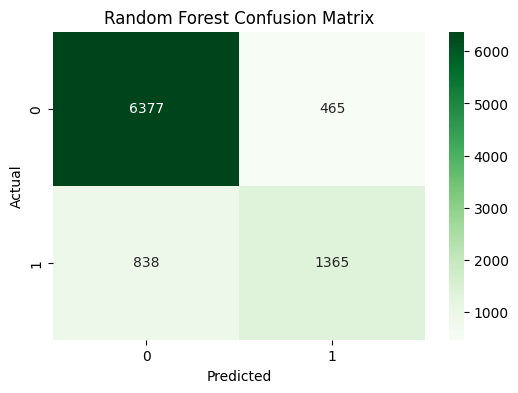

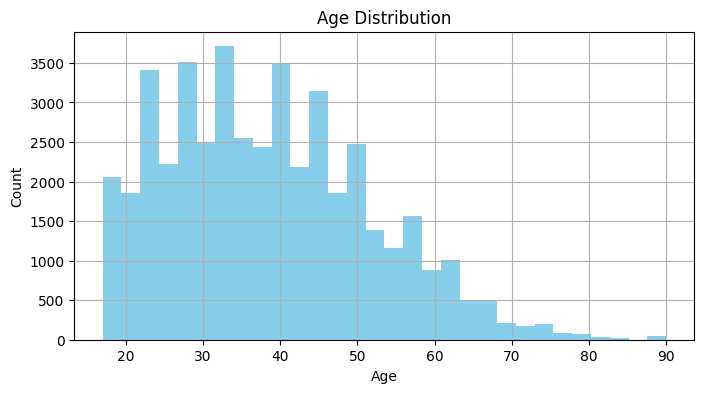

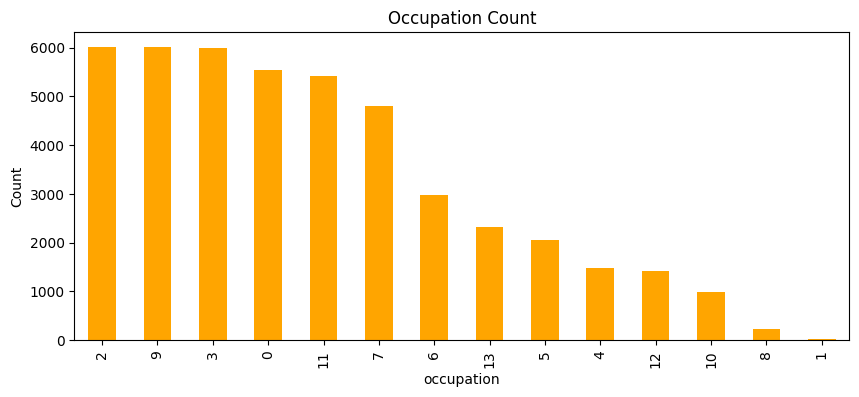

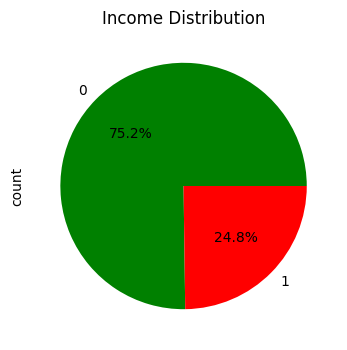

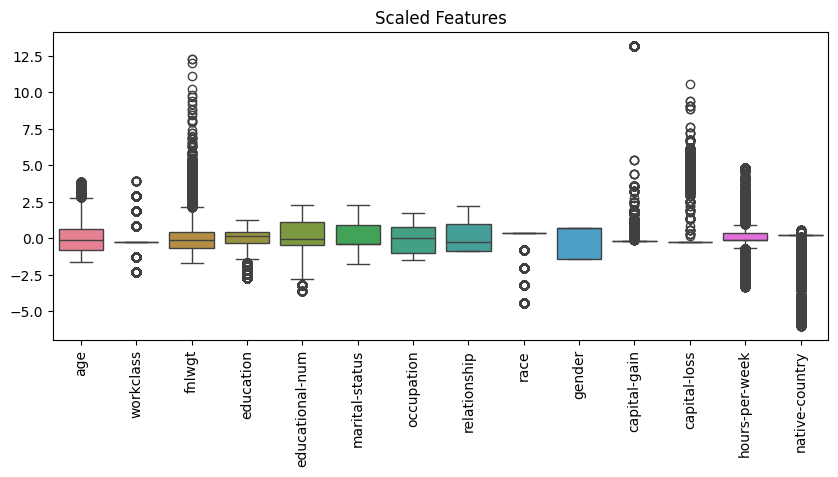

In [16]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the Dataset
df = pd.read_excel("adult 3.xlsx")  # Upload this file to Colab or same folder in Jupyter

# Step 3: Data Cleaning
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# Step 4: Label Encoding for Categorical Columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Step 5: Feature Scaling
X = df.drop("income", axis=1)
y = df["income"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Random Forest Model Training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Predictions
y_pred = rf.predict(X_test)

# Step 9: Evaluation
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", acc)

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Input 1: Dataset Preview
df.head()

# Input 2: Age Distribution
plt.figure(figsize=(8, 4))
df['age'].hist(bins=30, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Input 3: Occupation Count
plt.figure(figsize=(10, 4))
df['occupation'].value_counts().plot(kind='bar', color='orange')
plt.title("Occupation Count")
plt.ylabel("Count")
plt.show()

# Input 4: Income Pie Chart
plt.figure(figsize=(4, 4))
df['income'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Income Distribution")
plt.show()

# Input 5: Feature Scaling
X = df.drop("income", axis=1)
y = df["income"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(10, 4))
sns.boxplot(data=pd.DataFrame(X_scaled, columns=X.columns))
plt.title("Scaled Features")
plt.xticks(rotation=90)
plt.show()





In [17]:
# Train/Test Split + Random Forest Training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [18]:
# Output 1: Accuracy and Classification Report
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))



✅ Accuracy: 0.855942509673853

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      6842
           1       0.75      0.62      0.68      2203

    accuracy                           0.86      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.86      0.85      9045



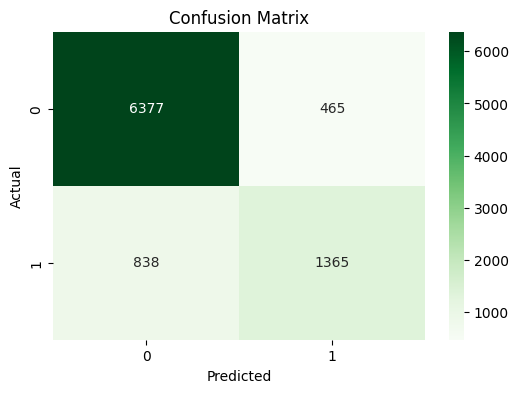

In [19]:
# OUTPUT 2: Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
# OUTPUT 3: Show 10 random actual vs predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).sample(10)


,Actual,Predicted
5528,1,0
41963,0,0
36881,1,1
26868,0,0
32076,0,0
32267,0,1
5829,0,0
5774,0,0
45909,0,0
484,0,0


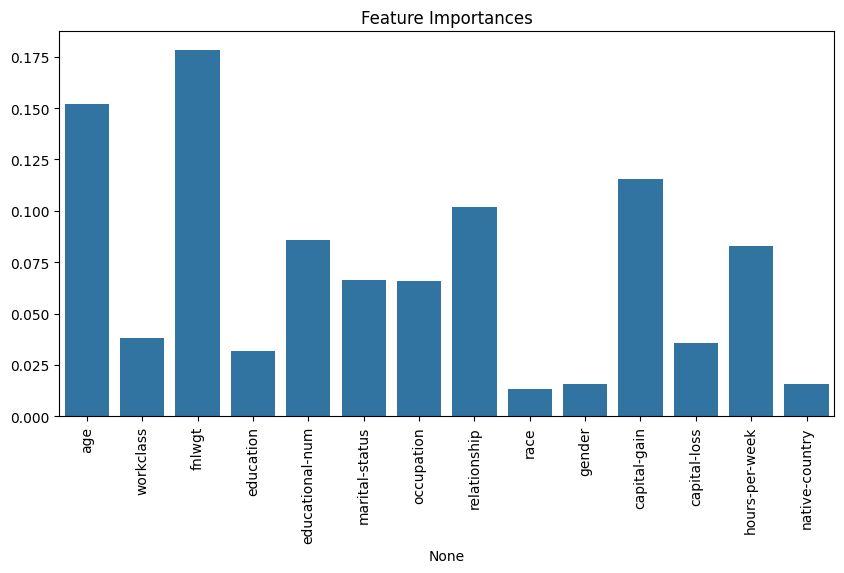

In [21]:
# OUTPUT 4: Feature importance plot
importances = rf.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=importances)
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()


In [22]:
# OUTPUT 5: Model summary
print("Model: RandomForestClassifier(n_estimators=100, random_state=42)")
print("Use this model to classify whether income is >50K or <=50K.")


Model: RandomForestClassifier(n_estimators=100, random_state=42)
Use this model to classify whether income is >50K or <=50K.
